In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
def weight(shape):
    return tf.Variable(tf.random_normal(shape=shape, stddev=0.1))
def bias(shape):
    return tf.Variable(tf.random_normal(shape=shape, stddev=0.1))

In [3]:
input = tf.placeholder(shape=[None, 784], dtype=tf.float32)
output = tf.placeholder(shape=[None, 784], dtype=tf.float32)
encoded = tf.matmul(input, weight([784, 32])) + bias([32])
encoded = tf.nn.relu(encoded)
decoded = tf.matmul(encoded, weight([32, 784])) + bias([784])
out = tf.nn.sigmoid(decoded)

In [4]:
loss = tf.reduce_sum(tf.square(tf.subtract(output, out)))
train_step = tf.train.AdamOptimizer().minimize(loss)

In [5]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
size = mnist.train.images.shape[0]
batch_size = 256
steps = int(size/batch_size)
epochs = 50

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [7]:
sess = tf.InteractiveSession()
init_op = tf.global_variables_initializer().run()
for i in range(epochs):
    for j in range(steps):
        X,_ = mnist.train.next_batch(batch_size)
        sess.run(train_step, feed_dict={input:X, output:X})
    if i % 5 == 0:
        print ("Epoch : {} , loss : {} ".format(i, sess.run([loss], feed_dict={input:X, output:X})))

Epoch : 0 , loss : [8546.8809] 
Epoch : 5 , loss : [3282.4084] 
Epoch : 10 , loss : [2192.8364] 
Epoch : 15 , loss : [2246.3892] 
Epoch : 20 , loss : [2150.9417] 
Epoch : 25 , loss : [2119.9221] 
Epoch : 30 , loss : [2120.5344] 
Epoch : 35 , loss : [2142.2471] 
Epoch : 40 , loss : [2117.4058] 
Epoch : 45 , loss : [1959.9258] 


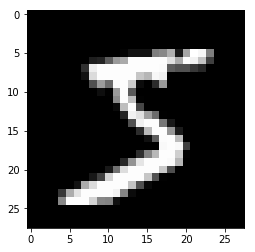

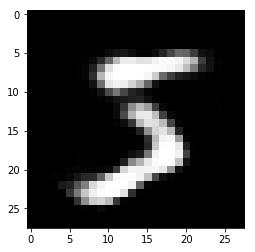

In [8]:
X = mnist.validation.images
input_image = X[0,:].reshape(28,28)
output_image = sess.run([out], feed_dict={input:X[0].reshape(1,784)}) 

plt.imshow(input_image, cmap='gray')
plt.show()
plt.imshow(output_image[0].reshape(28,28), cmap='gray')
plt.show()